# An introduction to the bispectrum

## Bispectrum

The bispectrum is a higher order Fourier spectral analysis technique that can be used to study the non linear properties of the time series. The bispectrum of a time series is given by:

$$
    B(\nu_1,\nu_2) =\frac{1}{K} \sum_{i=0}^{K-1}F_i(\nu_1)F_i(\nu_2)F^*_i(\nu_1+\nu_2)
$$

where K is the number of segments of the time series, $F_i(\nu)$ is the Fourier transform of the $i$ th segment of the time series at frequency $\nu$, and $F^*_i(\nu)$ is the complex conjugate of $F_i(\nu)$.

The bispectrum is a complex number that can be represented using an amplitude and a phase. This phase, which is called the biphase, holds information about the shape of the underlying lightcurve.

## Biphase

The bispectrum holds important information about the shape of the underlying light curve: specifically, the time asymmetry and the flux asymmetry.  The real component describes the extent to which the flux distribution of the source is skewed, and the imaginary component described the extent to which the time series is symmetric in time.

We define the biphase as the argument of the complex bispectrum
$$
    \beta(\nu_1,\nu_2) = \textrm{Arg}\left[B(\nu_1,\nu_2)\right]
$$


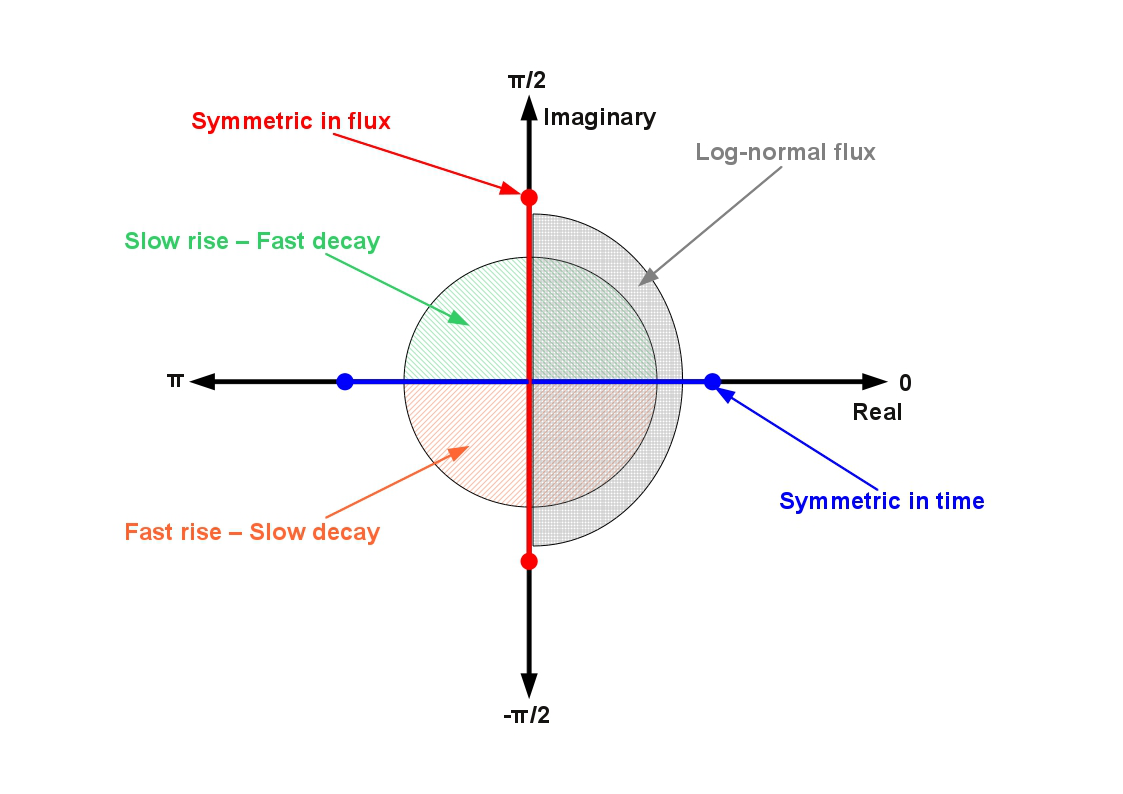

In [2]:
from IPython.display import Image
Image("Biphase_complex.png")

As can be seen in the illustration above, the biphase must be defined over the entire $2\pi$ interval. If you had a (perfect) eclipsing light curve, as it is symmetric in time, the bispectrum would have no imaginary component. But due to its strong (negative) flux asymmetry, it would have a biphase of $\pi$. For (perfect) pulsar like light curve, as it is also symmetric in time, the bispectrum would have no imaginary component. However due to its strong positive flux asymmetry, it would have a biphase of 0. 

Later in this tutorial, we will explore the case of two sawtooth curves. Here there is flux symmetry, so the bispectrum has no real component. Instead, as we will see, the biphase takes values of $\pi/2$ or $-\pi/2$


## Bicoherence

A related term is the bicoherence, which is analogous to the cross-coherence. The bicoherence is a measure of how consistent the biphase is between measurements.

The bicoherence has a value between 0 and 1, where 0 indicates that there is no non-linear coupling between the phases of the different Fourier frequencies, and 1 indicates total coupling.  Here, we use the Kim and Powers normalization, where the bicoherence is given by
$$
    b^2(\nu_1,\nu_2) =\frac{\left|\sum F_i(\nu_1)F_i(\nu_2)F^*_i(\nu_1+\nu_2) \right|^2}
    {\sum\left|F_i(\nu_1)F_i(\nu_2)\right|^2 \sum \left|F_i(\nu_1+\nu_2)\right|^2} 
$$
where we note that the denominator is related to the power spectra of the time series.

Here, $b^2$ measures the fraction of power at the frequency $\nu_1+\nu_2$ due to the coupling of the three frequencies. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Custom module by K. Arur, see BispecAnalysis.py for details
from BispecAnalysis import LightCurve, BispectralAnalysis

In [4]:
sawtooth_lc = LightCurve.from_file('sawtooth.txt')
ct1 = sawtooth_lc.data
t1 = sawtooth_lc.times

rev_sawtooth_lc = LightCurve.from_file('rev_sawtooth.txt')
ct2 = rev_sawtooth_lc.data
t2 = rev_sawtooth_lc.times


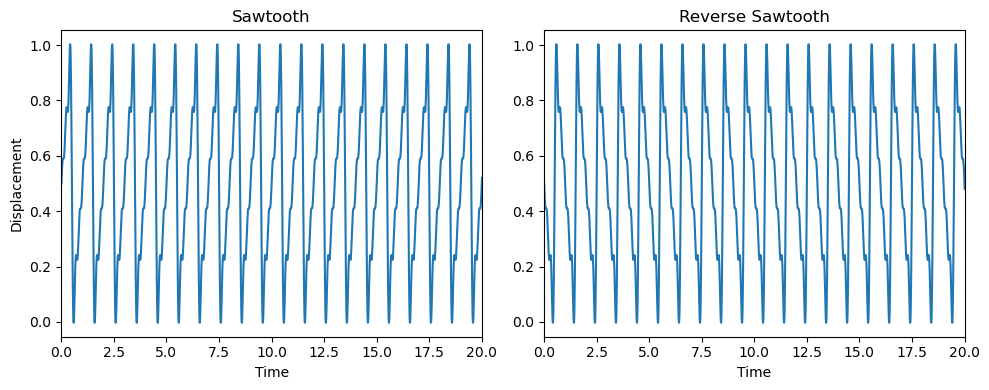

In [5]:
### Plot the curves
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# First time series
axes[0].plot(t1, ct1)
axes[0].set_xlim([0,20])
axes[0].set_title("Sawtooth")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Displacement")

# Second time series
axes[1].plot(t2, ct2)
axes[1].set_xlim([0,20])
axes[1].set_title("Reverse Sawtooth")
axes[1].set_xlabel("Time")

plt.tight_layout()
plt.show()

In [20]:
seglength = 1000

st_analysis = BispectralAnalysis(sawtooth_lc)
freqs1, power1, err1 = st_analysis.power_spectrum(seglength, normalization='abs_rms')

rst_analysis = BispectralAnalysis(rev_sawtooth_lc)
freqs2, power2, err2 = rst_analysis.power_spectrum(seglength, normalization='abs_rms')


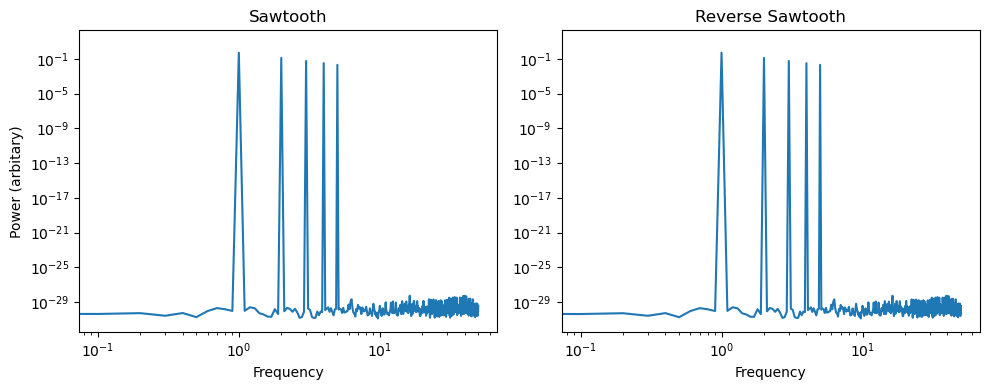

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# First time series
axes[0].loglog(freqs1, power1)
axes[0].set_title("Sawtooth")
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("Power (arbitary)")

# Second time series
axes[1].loglog(freqs2, power2)
axes[1].set_title("Reverse Sawtooth")
axes[1].set_xlabel("Frequency")

plt.tight_layout()
plt.show()

We can see that the power spectra are identical, as expected. The time series was generated using only 5 harmonics for this simple example, but you can of course generate a time series with many more harmonics if you would like. 

We see from the power spectrum that the peaks are at 1,2,3,4 and 5 Hz. Let us assume that we want to recover the phase difference between the fundamental at 1Hz and the second harmonic at 2Hz. For this, $\nu_1$ = $\nu_2$ = 1Hz, and $\nu_1+\nu_2$ = 2Hz. First, we run the bispectrum code. 



This code calculates the bispectrum averaged over the different segments, as well as the squared bicoherence. The bicoherence has a bias of ~$1/K$ (where K is the number of segments), so this is subtracted from the calculated bicoherence.

The code also calculates the variance of the squared bicoherence is given by 
\begin{equation}
\text{Var } b^2 \sim \frac{2b^2(\nu_1,\nu_2)}{K} (1 - b^2(\nu_1,\nu_2))^3
\end{equation}


Overall calling bispectrum returns the Fourier frequencies, the squared bicoherence $b^2$, its error, the log of $b^2$ (which is helpful for plotting, as we will see) as well as the biphase.



In [26]:
f1, bicoher1, err_bicoher1, logbicoher1, biphase1 = st_analysis.bispectrum(seglength)

Starting segment: 1 /  10
Starting segment: 2 /  10
Starting segment: 3 /  10
Starting segment: 4 /  10
Starting segment: 5 /  10
Starting segment: 6 /  10
Starting segment: 7 /  10
Starting segment: 8 /  10
Starting segment: 9 /  10
Starting segment: 10 /  10


### Sawtooth curve 

Let us now get the value of the biphase from the frequency regions of interest. First we retrieve the values in the case of the sawtooth curve.

In [23]:
foi1 = 1 #frequency 1 of interest
foi2 = 1 #frequency 2 of interest

bin_width = f1[1]-f1[0]
boi1 = int(foi1/bin_width)
boi2 = int(foi2/bin_width)

print(boi1, boi2)

10 10


In [24]:
print(biphase1[boi1-1][boi2-1]) #-1 because python starts counting from 0

1.5707963267948963


The value of the biphase here is $\pi$/2. This is as expected from a sawtooth wave, as it is symmetric in flux and asymmetric in time, with a slow rise and a fast decay. 

But remember that there always exists a value of the biphase. However, it is only meaningful if the bicoherence is high. So let us check what the value of the bicoherence is. 

In [25]:
print(bicoher1[boi1-1][boi2-1]) #-1 because python starts counting from 0

0.9


The bicoherence here is high, so we can feel comfortable in trusting the value of the biphase. 

As an aside, even though there is no noise added in this example, you can see that the maximum value of the bicoherence is suppressed. This is because a bias of 1/ Number of segments is subtracted off. You can change the segment length to 500 and see how the value changes!

Next, you will want to get the error on the biphase measurement. The variance on the biphase is given by 

\begin{equation}
    \text{Var } \beta = \frac{1}{2K} \left(\frac{1}{b^2(\nu_1,\nu_2)}-1\right)
\end{equation}

In [27]:
num_segments = len(ct1)/seglength
variance_biphase1 = (1.0/num_segments)*((1.0/(bicoher1[boi1-1][boi2-1]) - 1.0))

print('Error on biphase is', np.sqrt(variance_biphase1))

Error on biphase is 0.105409255338946


### Reverse sawtooth

Now, let us look at the biphase of the same set of frequencies, but for the reverse sawtooth case.

In [28]:
f2, bicoher2, err_bicoher2, logbicoher2, biphase2 = rst_analysis.bispectrum(seglength)

Starting segment: 1 /  10
Starting segment: 2 /  10
Starting segment: 3 /  10
Starting segment: 4 /  10
Starting segment: 5 /  10
Starting segment: 6 /  10
Starting segment: 7 /  10
Starting segment: 8 /  10
Starting segment: 9 /  10
Starting segment: 10 /  10


In [29]:
print(biphase2[boi1-1][boi2-1]) #-1 because python starts counting from 0

-1.570796326794897


The value of the biphase here is -$\pi$/2. This is as expected from a reverse sawtooth wave, as it is symmetric in flux and asymmetric in time, with a fast rise and a slow decay. 

In [17]:
print(bicoher2[boi1-1][boi2-1]) #-1 because python starts counting from 0

variance_biphase2 = (1.0/num_segments)*((1.0/(bicoher2[boi1-1][boi2-1]) - 1.0))

print('Error on biphase is', np.sqrt(variance_biphase2))

0.9
Error on biphase is 0.105409255338946


### Helpful References:

Thomas J. Maccarone, The biphase explained: understanding the asymmetries in coupled Fourier components of astronomical time series, Monthly Notices of the Royal Astronomical Society, Volume 435, Issue 4, 11 November 2013, Pages 3547–3558, https://doi.org/10.1093/mnras/stt1546

Elgar, S., R. T. Guza, Statistics of bicoherence, IEEE Acoust. Speech Signal Process., 36, 1667–1668, 1988.

Elgar, S., and G. Sebert (1989), Statistics of bicoherence and biphase, J. Geophys. Res., 94(C8), 10993–10998, doi:10.1029/JC094iC08p10993.